## <h2 align="center">Predicting Which Advertisement Platform Affect Sales </h2>

---


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from matplotlib import pyplot as plt
%matplotlib inline # To see graph in Jupyter

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Change  The File Directory 

In [3]:
 pwd

'C:\\Users\\sikde'

In [4]:
cd /Users/sikde/Documents/Jupyter/Linear_Regression/

C:\Users\sikde\Documents\Jupyter\Linear_Regression


### Load The Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.


In [5]:
advert = pd.read_csv("Advertising.csv")
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
advert.info() # To check the types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
advert.describe() # Statistical summary

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


###  Remove The Index Column

In [8]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
advert.drop(['Unnamed: 0'], axis = 1, inplace = True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Analysis 
Check the distribution of the data (sales, newspaper, radio, TV)

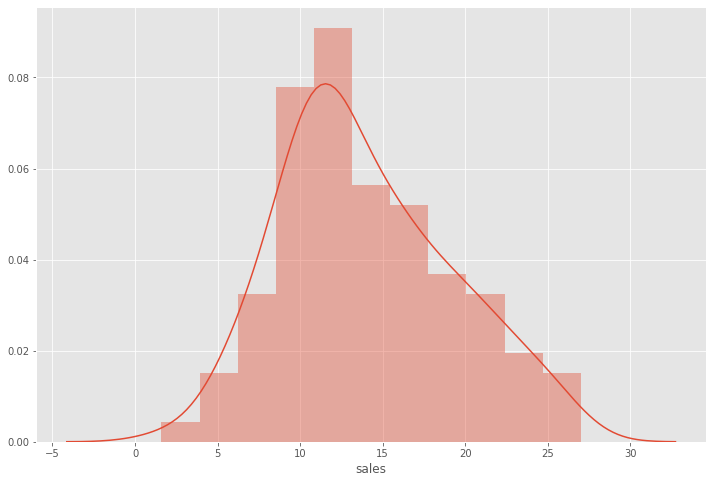

In [10]:
sns.distplot(advert.sales);

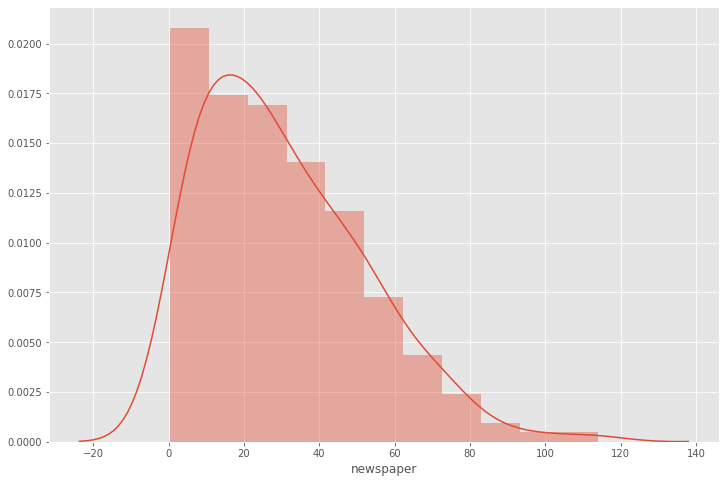

In [11]:
sns.distplot(advert.newspaper);

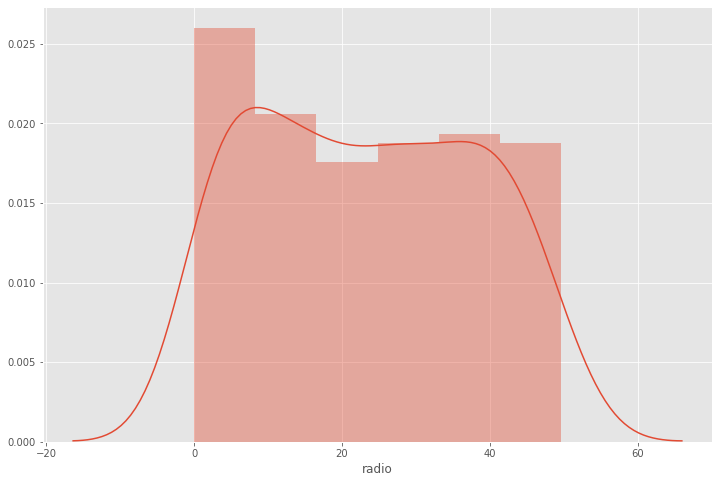

In [12]:
sns.distplot(advert.radio);

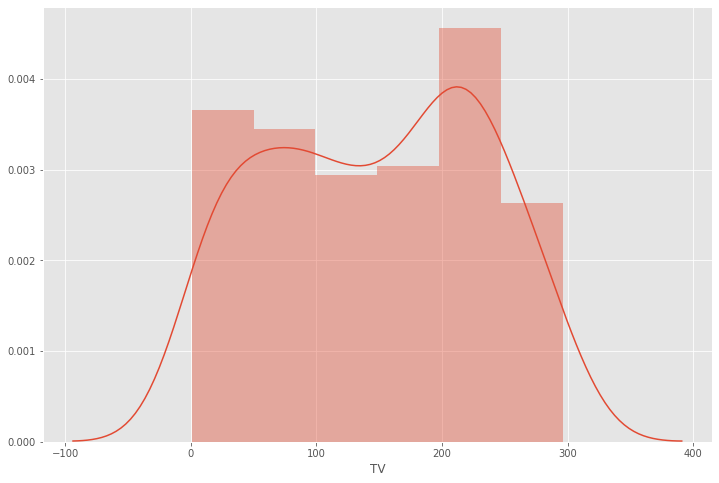

In [13]:
sns.distplot(advert.TV);

### Relationships Between The Predictors and Response Variable

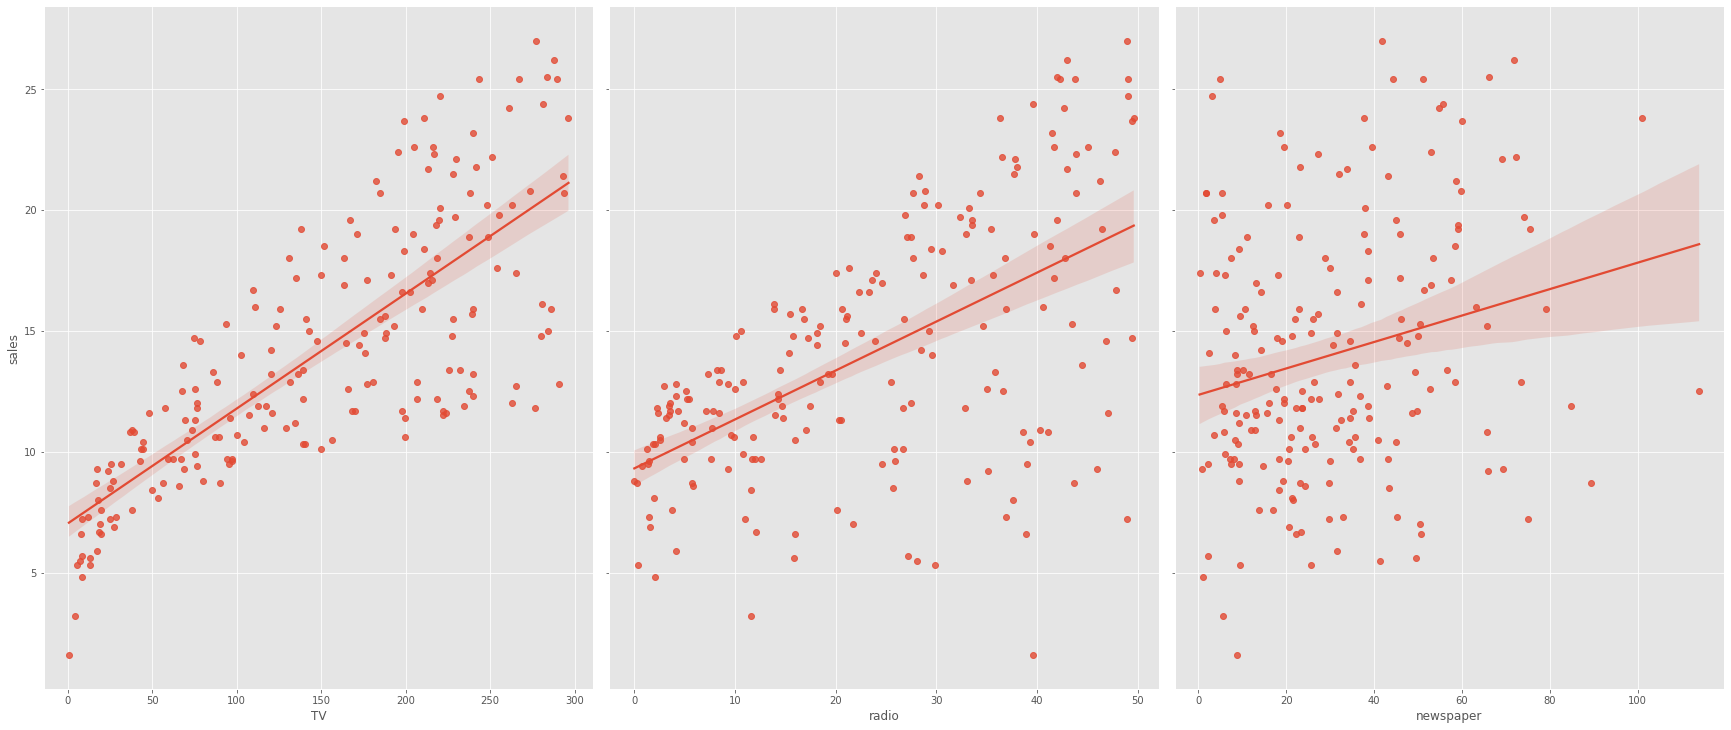

In [14]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=10, aspect=0.8, kind='reg');

In [15]:
advert.TV.corr(advert.sales) # Correlation between TV and sales

0.7822244248616061

In [16]:
advert.radio.corr(advert.sales)  # Correlation between radio and sales

0.5762225745710551

In [17]:
advert.newspaper.corr(advert.sales)  # Correlation between newspaper and sales

0.22829902637616528

In [18]:
advert.corr() # Correlation in table form

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


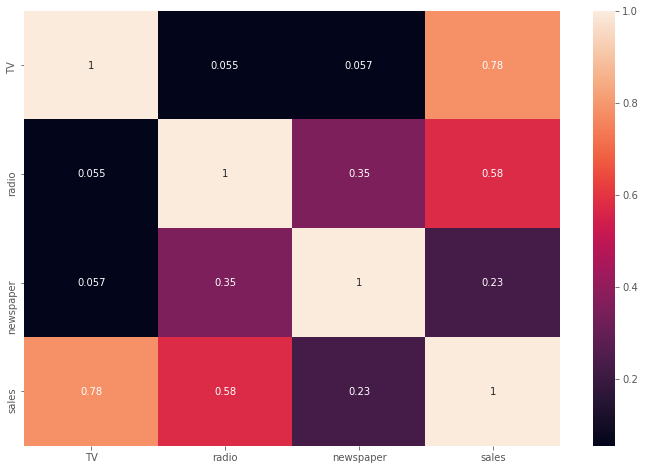

In [19]:
sns.heatmap( advert.corr(), annot=True )  # Correlation in heatmap

#### Summary

There is a correlation between sales revenue generated with respect to advertisement spends on TV. 

There is a weak correlation between sales revenue generated with respect to advertisement spends on radio.

There is no correlation between sales revenue generated with respect to advertisement spends on newspaper.

### Simple Linear Regression Model
<h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>


In [20]:
x1 = advert[['TV']]
x1.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
x2 = advert[['radio']]
x2.head()

,radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8


In [22]:
x3 = advert[['newspaper']]
x3.head()

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4


In [23]:
y = advert.sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [24]:
# Check the type and shape for x1(TV), x2(radio) and x3(newspaper)
print(type(x1))
print(x1.shape)
print(type(x2))
print(x2.shape)
print(type(x3))
print(x3.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)
<class 'pandas.core.frame.DataFrame'>
(200, 1)
<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [25]:
# Check the type and shape for sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [26]:
# Create train and test data for x1(TV), x2(radio) and x3(newspaper)
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, random_state=1)
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, random_state=1)
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, random_state=1)

In [27]:
# Check the train/test split for x1(TV), x2(radio) and x3(newspaper)
print(x1_train.shape)
print(x1_test.shape)
print(x2_train.shape)
print(x2_test.shape)
print(x3_train.shape)
print(x3_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [28]:
# Check the train/test split for sales
print(y_train.shape)
print(y_test.shape)

(150,)
(50,)


### Three Simple Linear Regression

<h5 align=center> $$Model_1: sales = \beta_0 + \beta_1 \times TV + \epsilon$$ </h5>
<h5 align=center> $$Model_2: sales = \beta_0 + \beta_1 \times radio + \epsilon$$ </h5>
<h5 align=center> $$Model_3: sales = \beta_0 + \beta_1 \times newspaper + \epsilon$$ </h5>

In [29]:
from sklearn.linear_model import LinearRegression

# Model 1: Realtionship between TV and sales
linreg1 = LinearRegression()
linreg1.fit(x1_train, y_train)

# Model 2: Realtionship between radio and sales
linreg2 = LinearRegression()
linreg2.fit(x2_train, y_train)

# Model 3:Realtionship between newspaper and sales
linreg3 = LinearRegression()
linreg3.fit(x3_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting Model Coefficients

In [30]:
# print the intercept and coefficients for Model 1
print("b0: ", end = "")
print(linreg1.intercept_)
print("b1: ", end = "")
print(linreg1.coef_)

b0: 6.91197261886872
b1: [0.04802945]


In [31]:
# print the intercept and coefficients for Model 2
print("b0: ", end = "")
print(linreg2.intercept_)
print("b1: ", end = "")
print(linreg2.coef_)

b0: 9.338594553143713
b1: [0.19338969]


In [32]:
# print the intercept and coefficients for Model 3
print("b0: ", end = "")
print(linreg3.intercept_)
print("b1: ", end = "")
print(linreg3.coef_)

b0: 11.765576707409684
b1: [0.06888299]


### Making Predictions with our Model

In [33]:
# Make predictions on the testing set
y1_pred = linreg1.predict(x1_test)
y2_pred = linreg2.predict(x2_test)
y3_pred = linreg3.predict(x3_test)

### Model Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error** 
(RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [38]:
import sklearn.metrics as metrics
print("Model 1")
print("MAE: ", end ="")
print(metrics.mean_absolute_error(y_test, y1_pred))
print("MSE: ", end ="")
print(metrics.mean_squared_error(y_test, y1_pred))
print("RMSE: ", end ="")
print(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))

Model 1
MAE: 2.4643080986027908
MSE: 10.310069587813155
RMSE: 3.210929707703542


In [39]:
print("Model 2")
print("MAE: ", end ="")
print(metrics.mean_absolute_error(y_test, y2_pred))
print("MSE: ", end ="")
print(metrics.mean_squared_error(y_test, y2_pred))
print("RMSE: ", end ="")
print(np.sqrt(metrics.mean_squared_error(y_test, y2_pred)))

Model 2
MAE: 3.0729325754783434
MSE: 13.826544530930674
RMSE: 3.7184061815421234


In [40]:
print("Model 3")
print("MAE: ", end ="")
print(metrics.mean_absolute_error(y_test, y3_pred))
print("MSE: ", end ="")
print(metrics.mean_squared_error(y_test, y3_pred))
print("RMSE: ", end ="")
print(np.sqrt(metrics.mean_squared_error(y_test, y3_pred)))

Model 3
MAE: 4.142890782340883
MSE: 25.196780034607823
RMSE: 5.019639432728991


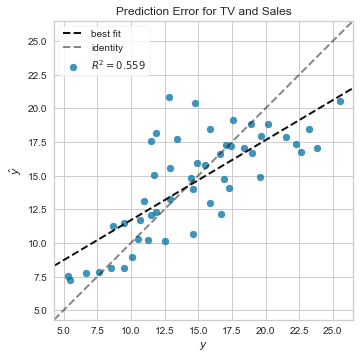

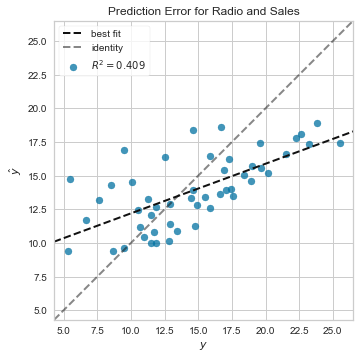

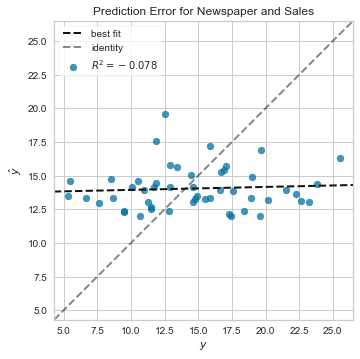

In [49]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

title1 = "Prediction Error for TV and Sales"
visualizer = PredictionError(linreg1, title = title1)
visualizer.fit(x1_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x1_test, y_test)  # Evaluate the model on the test data
visualizer.show()

title2 = "Prediction Error for Radio and Sales"
visualizer = PredictionError(linreg2, title = title2)
visualizer.fit(x2_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x2_test, y_test)  # Evaluate the model on the test data
visualizer.show()

title3 = "Prediction Error for Newspaper and Sales"
visualizer = PredictionError(linreg3, title = title3)
visualizer.fit(x3_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x3_test, y_test)  # Evaluate the model on the test data
visualizer.show()

#### Summary

Using a single predictor is not sufficent to predict the sales. The best single predictor is TV: only 55.9% of the sales can be explained by advertisement spends on TV. 

### Multiple Linear Regression
<h5 align=center> $$y = \beta_0 + \beta_1 \times X_1 + \beta_2 \times X_2 + \beta_3 \times X_3 + ... + \epsilon$$ </h5>

For our example:

<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

In [50]:
from sklearn.linear_model import LinearRegression

# create x and y
predictors = ['TV', 'radio', 'newspaper']
x = advert[predictors]
y = advert.sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(x, y)

# print the coefficients
print("b0: ", end = "")
print(lm1.intercept_)
print("b1: ", end = "")
print(lm1.coef_[0])
print("b2: ", end = "")
print(lm1.coef_[1])
print("b3: ", end = "")
print(lm1.coef_[2])

b0: 2.9388893694594085
b1: 0.045764645455397615
b2: 0.18853001691820456
b3: -0.0010374930424763272


### Find The Coefficient Of Multiple Determination For Multiple Regression

In [64]:
from sklearn.metrics import r2_score

# Predictors = TV, radio and newspaper
lm1_preds = lm1.predict(x[['TV', 'radio','newspaper']])
print("R^2: ", r2_score(y, lm1_preds))

R^2:  0.8972106381789522


In [52]:
# Predictors = TV and radio
lm2 = LinearRegression().fit(x[['TV', 'radio']], y)
lm2_preds = lm2.predict(x[['TV', 'radio']])
print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828956


In [53]:
# Predictors = TV and newspaper
lm3 = LinearRegression().fit(x[['TV', 'newspaper']], y)
lm3_preds = lm3.predict(x[['TV', 'newspaper']])
print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.6458354938293271


In [54]:
# Predictors = radio and newspaper
lm4 = LinearRegression().fit(x[['radio', 'newspaper']], y)
lm4_preds = lm4.predict(x[['radio', 'newspaper']])
print("R^2: ", r2_score(y, lm4_preds))

R^2:  0.33270518395032245


#### Summary

As we can see two models stand out:

<h5 align=center> $$Model_1 : sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

<h5 align=center> $$Model_2 : sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \epsilon$$ </h5>

In [66]:
from sklearn.metrics import mean_squared_error

# Model 1: Realtionship between TV, newspaper and radio with sales
X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.4046514230328955
R^2:  0.9156213613792232


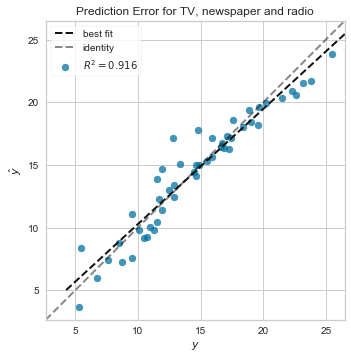

In [67]:
title4 = "Prediction Error for TV, newspaper and radio"
visualizer = PredictionError(lm4, title = title4)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [69]:
# Model 2: Realtionship between TV, newspaper and radio with sales
X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 1.3879034699382888
R^2:  0.9176214942248908


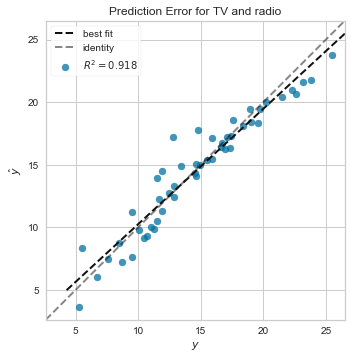

In [70]:
title5 = "Prediction Error for TV and radio"
visualizer = PredictionError(lm5, title = title5)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

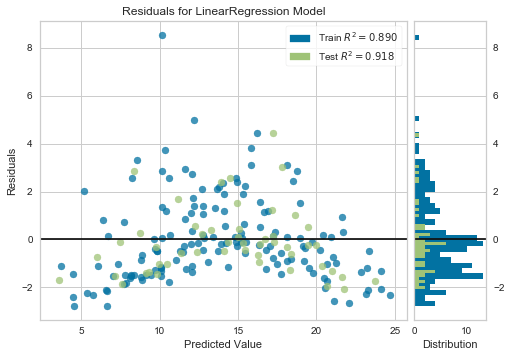

In [71]:
# Visualize the residuals = no pattern and forms around zero
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

#### Summary

Both models predict sales revenue really well: R-squared above 90%. However, TV and radio explain the sales revenue slightly better than TV, radio and newspaper. 

Is there an interaction effect between TV and radio?

###  Interaction Effect

In [60]:
# Create the interaction variable
advert['interaction'] = advert['TV'] * advert['radio']

In [61]:
X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 0.7011871137164326
R^2:  0.9789736814681261


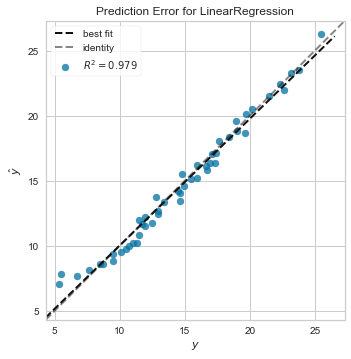

In [62]:
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

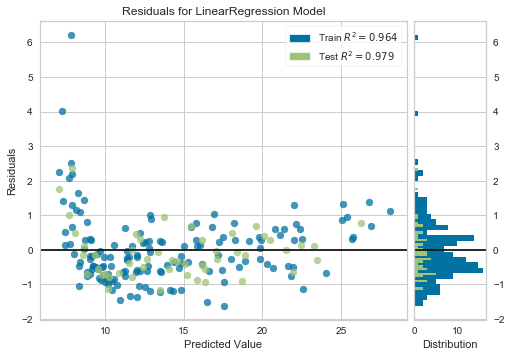

In [63]:
# Visualize the residuals = no pattern and forms around zero
visualizer = ResidualsPlot(lm6)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

### Conclusion

With the interaction variable, the R-squared increased and root mean squared decreased significantly.
Hence, advertisement spend on TV has a different effect on the sales depending on advertisement spend on radio. Based on the data, I would recommend canceling all advertisement on newspaper and allocating those funds to TV and Radio advertisement.